In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
PATH = os.path.dirname('dataset/')

In [7]:
train_dir = os.path.join(PATH, 'training_set')
test_dir = os.path.join(PATH, 'test_set')

'dataset/training_set'

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')  # directory with our validation cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')  # directory with our validation dog pictures

In [11]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(test_cats_dir))
num_dogs_val = len(os.listdir(test_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [14]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total test cat images:', num_cats_val)
print('total test dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_val)

total training cat images: 4000
total training dog images: 4000
total test cat images: 1000
total test dog images: 1000
--
Total training images: 8000
Total test images: 2000


In [16]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Data Preperation

In [17]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [18]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 8000 images belonging to 2 classes.


In [20]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.


In [21]:
sample_training_images, _ = next(train_data_gen)


In [22]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


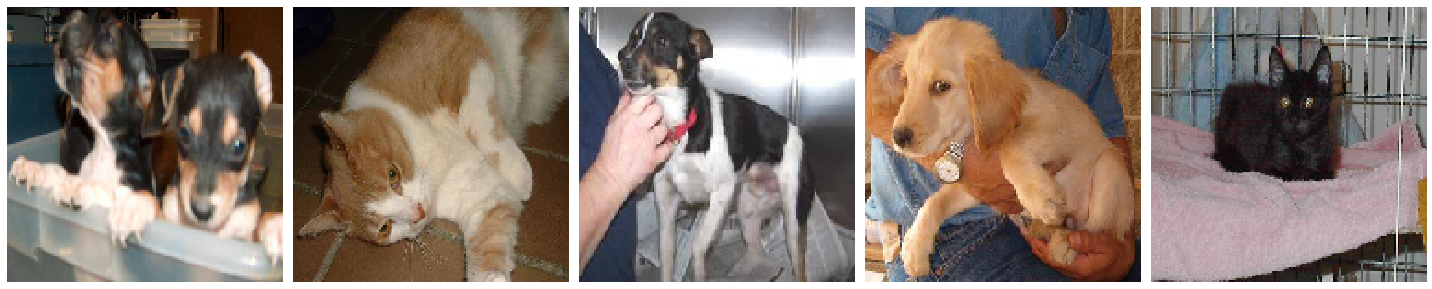

In [23]:
plotImages(sample_training_images[:5])


In [24]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 15 steps
Epoch 1/15
62/62 [==============================] - 51s 818ms/step - loss: 0.8736 - accuracy: 0.5032 - val_loss: 0.6629 - val_accuracy: 0.5906
Epoch 2/15
62/62 [==============================] - 49s 783ms/step - loss: 0.6310 - accuracy: 0.6132 - val_loss: 0.6163 - val_accuracy: 0.6958
Epoch 3/15
62/62 [==============================] - 49s 793ms/step - loss: 0.5509 - accuracy: 0.7031 - val_loss: 0.5361 - val_accuracy: 0.7432
Epoch 4/15
62/62 [==============================] - 49s 785ms/step - loss: 0.4994 - accuracy: 0.7386 - val_loss: 0.5708 - val_accuracy: 0.7458
Epoch 5/15
62/62 [==============================] - 50s 807ms/step - loss: 0.4561 - accuracy: 0.7716 - val_loss: 0.5015 - val_accuracy: 0.7578
Epoch 6/15
62/62 [==============================] - 50s 805ms/step - loss: 0.4135 - accuracy: 0.7959 - val_loss: 0.49

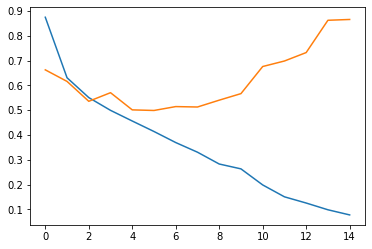

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

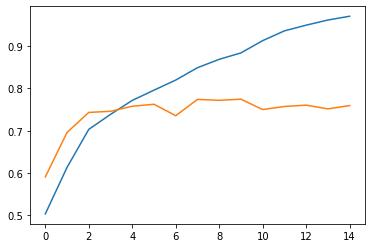

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])